# Previsão de Vendas através da Análise de Séries Temporais

A análise de séries temporais  é um método utilizado para identificação de padrões e recursos representados pelos dados ou previsões de valores futuros baseados em dados anteriores.

Esse método é bastante utilizado para analisar dados não estacionários, como por exemplo:
* Dados meteorológicos;
* Previsão de preços de ações;
* Previsões de tendências econômicas;
* Previsão de vendas de lojas.

Os dados que usaremos nessa análise são dados de exemplo de uma base de dados utilizada por toda comunidade de Data Science e Analytics conhecida como Superstore Sales. Essa base é utilizada na aplicação de algoritmos de teste, criação de dashboards, entre outros. Os dados podem ser baixados através do link: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

### Uma breve análise exploratória dos dados

In [1]:
# Import libraries
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

plt.style.use('seaborn-whitegrid')

Nessa parte iremos ler o cabeçalho dos dados para tentar entender quais colunas serão necessárias para nossa análise

In [2]:
# Importando os dados da SuperStore
df = pd.read_excel('data\Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Como podemos observar acima no dataset, temos 21 colunas no conjunto de dados. Vamos dar uma olhada nos nomes das colunas e seus tipos

In [3]:
# Retornando as colunas, tamanho e os seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# Retorna um array com todos nomes das colunas 
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

Sabendo quais informações temos nas colunas podemos verificar se há algum valor faltando nos dados.
Como conseguimos observar abaixo, não tivemos nenhum problema de falta de dados e então prosseguiremos com a análise

In [5]:
df.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

Ao analisar o cabeçalho das colunas conseguimos identificar que existe uma coluna de categoria (Category). Como observado abaixo temos 3 categorias de tipo de itens vendidos que é Funiture (Móveis), Office Supplies (Materiais de escritório) e Technology (Tecnologia)

In [6]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Como podemos observar acima, temos diferentes categorias de produtos em conformidade. A categoria Office Supplies ou Materiais de escritório será utilizada como exemplo nessa análise por justamente aparecer mais vezes no dataset que as demais categorias. Se o objetivo dessa análise fosse identificar uma categoria específica poderiamos analisar as outras duas, por exemplo, se o negócio dependesse de itens de técnologia poderiamos realizar a análise temporal através dessa categoria, porém não é o nosso objetivo.

In [8]:
# Extraindo os dados de materiais de escritório

office_supplies = df.loc[df['Category'] == 'Office Supplies']

A seguir iremos extrair o período menor e o período maior de vendas afim de identificar a volumetria dos dados disponibilizados. Como podemos ver abaixo temos um bom histórico de quase 4 anos de dados de vendas.

In [9]:
# Variavél será utilizada mais pra frente a fim de identificarmos 
# se a quantidade de linhas bate com a quantidade de datas
period = office_supplies['Order Date'].max() - office_supplies['Order Date'].min()
office_supplies['Order Date'].min() , office_supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Com base na análise exploratória dos dados tentaremos encontrar alguns padrões nos dados disponibilizados

### Processamento de dados

Com a análise exploratória realizada e definido que análise será feita em cima dos dados de venda de matériais de escritório, iremos remover as colunas que não serão necessárias na análise.

In [10]:
# Selecionando apenas as colunas necessárias
office_supplies = office_supplies[['Order Date', 'Sales']]
office_supplies.head()

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900


In [11]:
# Iremos reordenar o dataset com base na data e resetar o indice
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


Como reordenamos o dataset e resetamos o índice, iremos setar um novo índice através da data do pedido (Order Date), afim de identificar se os dados são contínuos ou não.

In [12]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [13]:
office_supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [14]:
period

Timedelta('1457 days 00:00:00')

Como podemos observar acima, estão faltando alguns dias nesse dataset, temos um tamanho de 1148 linhas quando deveriamos ter 1457 no período de 03/01/2014 à 30/12/2017. Com base nessa informação, iremos utilizar valores médios de vendas diárias no mês.

In [15]:
monthly = office_supplies['Sales'].resample('MS').mean()

In [16]:
monthly

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

### Realizando a visualização dos dados das séries temporais de vendas

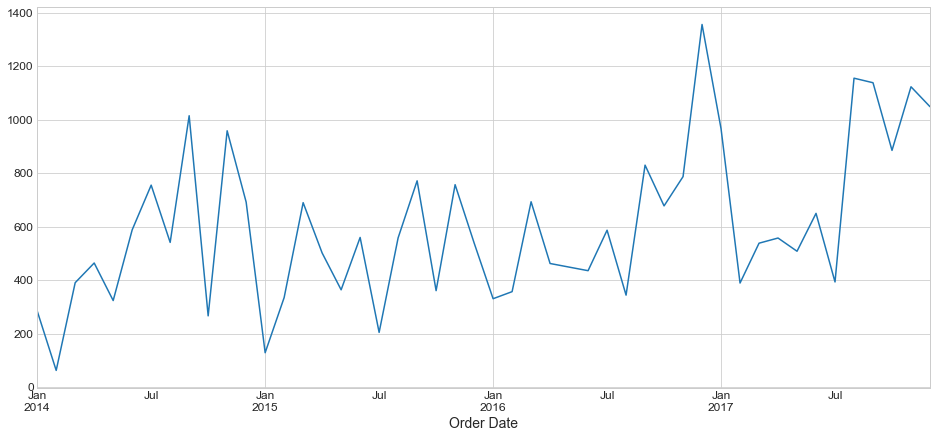

In [17]:
monthly.plot(figsize = (16, 7))
plt.show()

Como podemos observar acima, alguns padrões distintos conseguem ser identificados quando traçamos os dados, por exemplo, no início do ano as vendas tendem a ser mais baixas e no final do ano as vendas tendem a ser mais altas.

Para que fique mais claro, podemos visualizar nossos dados utilizando um método chamado decomposição de séries temporais. Esse método nos permite decompor nossa série em três componentes distintos, entre eles são:
* Tendência;
* Sazonalidade;
* Ruído.

<function matplotlib.pyplot.show(close=None, block=None)>

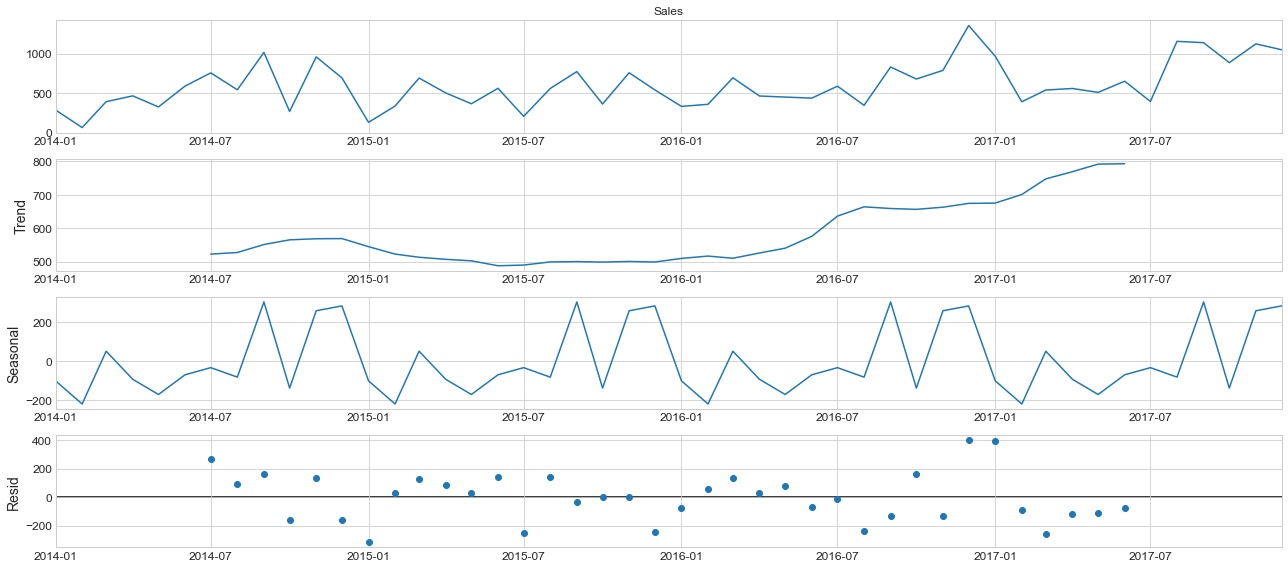

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
plt.show

Como podemos observar na figura acima, fica mais claro como funciona a sazonalidade em nossos dados e conseguimos ver que há uma tendência no aumento das vendas ao longo dos anos

### Previsão das séries temporais com ARIMA

ARIMA ou Média Móvel Integrada Autoregressiva é um metódo bastante conhecido em Data Science para realização de previsão de dados através de séries temporais.
Os modelos ARIMA utilizam sempre a notação ARIMA(p,d,q). A existência desses três parâmetros é o que explica a sazonalidade, tendência e o ruído nos dados

Abaixo iremos mostrar como devemos sempre implementar um modelo ARIMA

In [19]:
#as siglas p, d e q devem sempre utilizar o range de 0,2 ou seja ou é 0 ou 1 (binário)
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Exemplos de combinações de parâmetros para ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de combinações de parâmetros para ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Feito isso agora iremos criar uma estrutura que irá decidir quais serão os parametros ideais para a execução do algoritmo ARIMA

In [20]:
warnings.filterwarnings("ignore")
lista = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            params = []
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            params.append(param)
            params.append(param_seasonal)
            params.append(results.aic)
            lista.append(params)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1218.0844053030983
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.73353987806166
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.71014965102756
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1420.0290260795184
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335.9078573355504
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292464
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2733.523800538984
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.7601415814785
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.86259572792255
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646587001
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2635.5913804912875
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.6922094460101
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.8450775299697
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572044948625
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1369.2062640395875
AR

In [21]:
#Encontrar o menor valor de AIC

value = lista[0][2]
for i in range(len(lista)):
    if value > lista[i][2]:
        value = lista[i][2]
        value_params = lista[i]

In [22]:
value

302.4808824105489

In [23]:
value_params

[(0, 1, 1), (0, 1, 1, 12), 302.4808824105489]

Como vimos acima a saída SARIMAX (0,1,1) x (0,1,1,12) produz o valor de AIC 302,48 que é o menor valor encontrador. Portanto, iremos considerar esse valor como melhor opção para execução do algoritmo

### Ajustando o modelo ARIMA

Abaixo iremos informar os parâmetros escolhidos para o modelo SARIMAX

In [24]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = value_params[0],
                                seasonal_order = value_params[1],
                                enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8436      0.117     -7.239      0.000      -1.072      -0.615
ma.S.L12      -1.0001      0.201     -4.978      0.000      -1.394      -0.606
sigma2      4.502e+04   4.46e-06   1.01e+10      0.000     4.5e+04     4.5e+04


Após feito a execução do modelo SARIMAX com os parâmetros selecionados, iremos ver o modelo de diagnóstico para investigar qualquer comportamento incomum.

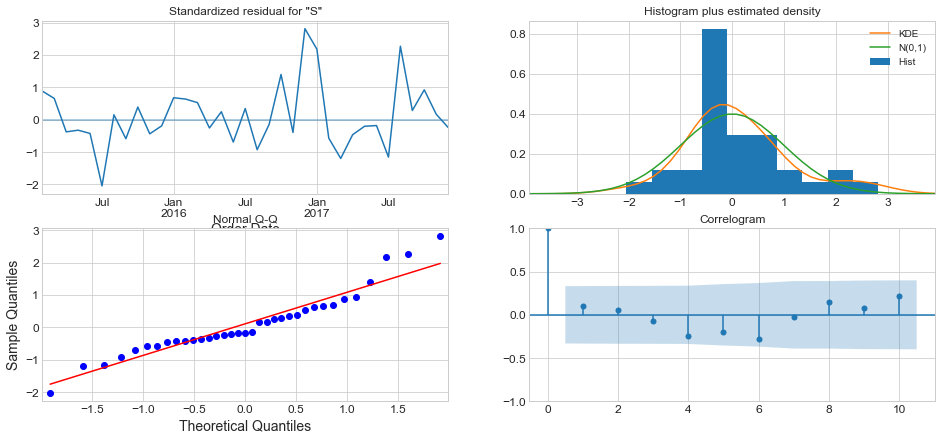

In [25]:
results.plot_diagnostics(figsize = (16,7))
plt.show()

Como podemos ver acima, o modelo não é perfeito. Porém se observarmos o gráfico residual podemos observar que os resíduos do modelo são quase normalmente distribuídos.

### Validando previsões

Com o modelo executado, podemos validar se as previsões estão perto do esperado. Iremos comparar as vendas reais com a nossa previsão criada para começarem a partir do dia 01/01/2017 até o fim dos dados.

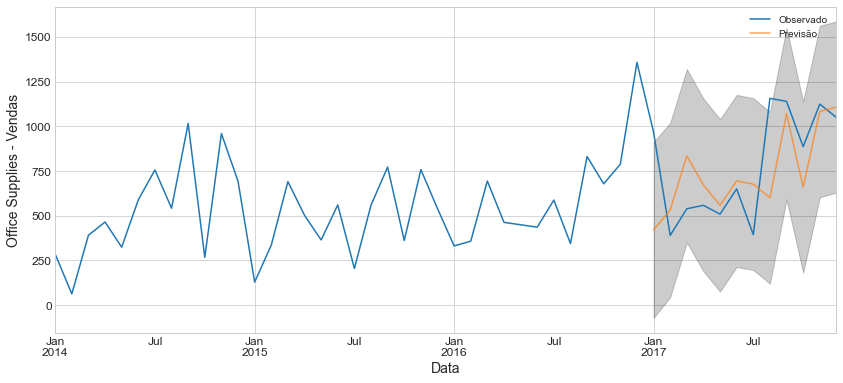

In [26]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'Observado')
pred.predicted_mean.plot(ax = ax, label = 'Previsão', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Data')
ax.set_ylabel('Office Supplies - Vendas')
plt.legend()
plt.show()

Como podemos observar acima, a linha azul trata-se das vendas observadas durante o período e a linha laranja trata-se da previsão. No geral as linhas de observado e previsão se alinham muito bem e a área cinzenta é o indíce de confiança desses dados, ou seja eles podem variar mais do que o previsto.

In [27]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('O erro quadrático das previsões é de {}'.format(round(mse, 2)))

O erro quadrático das previsões é de 72799.17


In [28]:
print('A raiz do erro quadrático médio de nossas previsões é de {}'.format(round(np.sqrt(mse), 2)))

A raiz do erro quadrático médio de nossas previsões é de 269.81


A raiz do erro quadrático médio ou Root Mean Squared Error (RMSE) mostra que o modelo implementado foi capaz de prever a média diária de vendas dos materiais de escritório no conjunto de testes dentro de 269,81 das vendas reais. As vendas diária dos materiais de escritório variam de cerca de 50 à 1350, ou seja, nosso modelo até o presente momento está funcionando muito bem.

### Produzindo e visualizando as previsões

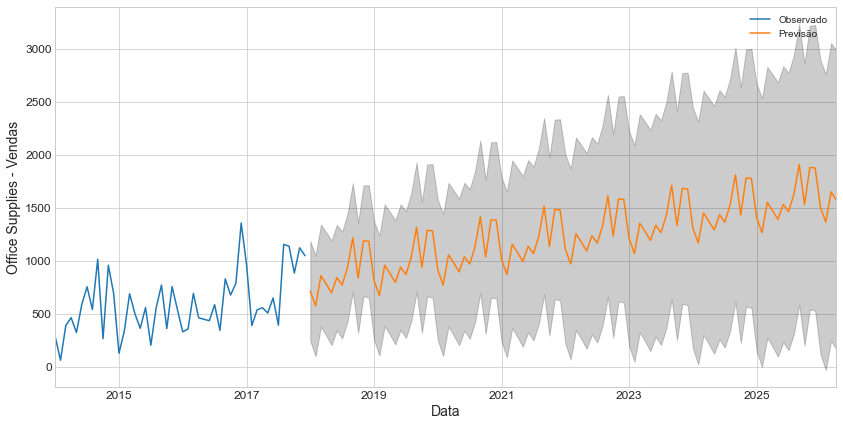

In [29]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label = 'Observado', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Previsão')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Data')
ax.set_ylabel('Office Supplies - Vendas')
plt.legend()
plt.show()

Como podemos observar, nosso modelo de previsão ARIMA conseguiu capturar claramente a sazonalidade das vendas dos materiais de escritório. Como comentamos anteriormente a área cinzenta é o índice de confiança desses dados e como está apresentado no gráfico acima, é normal que com o passar do tempo a área cinzenta seja maior e menos confiante, por isso é sempre bom treinarmos um modelo mais de uma vez sempre que tivermos dados novos.

### Conclusão

Como vimos durante a criação do algoritmo, podemos observar que a análise exploratória dos dados é uma parte bastante importante na aplicação de qualquer modelo, pois é nela que iremos nos aprofundar e ser o entendedor do dado. Conseguimos observar também que o algoritmo ARIMA pode ser bastante eficaz na previsão de vendas se utilizado da maneira correta e tivermos um bom histórico. 
Uma sugestão desse algoritmo para análise de vendas é que podemos utiliza-lo por exemplo na detecção de outliers de vendas ou estoques de uma determinada, indústria, item, varejo, etc.